## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

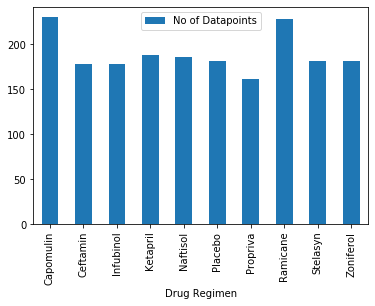

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = combined_df.groupby(['Drug Regimen'])['Mouse ID'].count()
data_points_df = data_points.to_frame("No of Datapoints").reset_index()
data_points_df.plot.bar(x='Drug Regimen', y='No of Datapoints', rot=90)

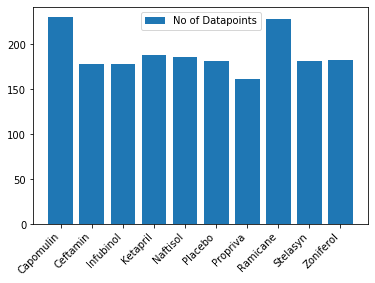

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
fig, ax = plt.subplots()
ax.bar(data_points_df.index, data_points_df['No of Datapoints'], label='No of Datapoints')
ax.set_xticks(data_points_df.index)
ax.set_xticklabels(data_points_df['Drug Regimen'], rotation=45, ha='right')
ax.legend()
plt.show()

## Pie plots

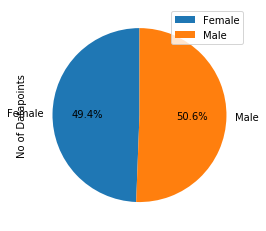

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = combined_df.groupby(['Sex'])['Mouse ID'].count()
gender_dist_df = gender_dist.to_frame("No of Datapoints")
gender_dist_df.plot.pie(y='No of Datapoints', startangle=90, autopct='%1.1f%%')

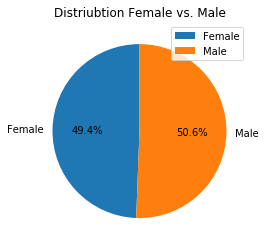

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
fig, ax = plt.subplots()
gender_dist_df
ax.pie(gender_dist_df['No of Datapoints'], explode=None, labels=gender_dist_df.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Distriubtion Female vs. Male')
ax.legend()
plt.show()

## Quartiles, outliers and boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
regimens = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_volume = combined_df.loc[combined_df['Drug Regimen'].isin(regimens)]
capomulin = tumor_volume.loc[tumor_volume['Drug Regimen']=='Capomulin']
ramicane = tumor_volume.loc[tumor_volume['Drug Regimen']=='Ramicane']
infubinol = tumor_volume.loc[tumor_volume['Drug Regimen']=='Infubinol']
ceftamin = tumor_volume.loc[tumor_volume['Drug Regimen']=='Ceftamin']
#sns.boxplot(x=capomulin['Tumor Volume (mm3)'])

def quantile_analysis(df, name):
    quantiles = df.quantile([.25, .5, .75])
    lowerq = quantiles[0.25]
    upperq = quantiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    print(f'Quartiles analysis for {name}')
    print(f'lower quartile {lowerq:.2f}')
    print(f'upper quartile {upperq:.2f}')
    print(f'IQR {iqr:.2f}')
    print(f'Lower bound {lower_bound:.2f}')
    print(f'Upper bound {upper_bound:.2f}')
    print(f'------------------------------')

quantile_analysis(capomulin['Tumor Volume (mm3)'], 'Capomulin')
quantile_analysis(ramicane['Tumor Volume (mm3)'], 'Ramicane')
quantile_analysis(infubinol['Tumor Volume (mm3)'], 'Infubinol')
quantile_analysis(ceftamin['Tumor Volume (mm3)'], 'Ceftamin')



Quartiles analysis for Capomulin
lower quartile 37.69
upper quartile 45.00
IQR 7.31
Lower bound 26.71
Upper bound 55.97
------------------------------
Quartiles analysis for Ramicane
lower quartile 36.67
upper quartile 45.00
IQR 8.33
Lower bound 24.19
Upper bound 57.49
------------------------------
Quartiles analysis for Infubinol
lower quartile 47.31
upper quartile 57.31
IQR 10.00
Lower bound 32.31
Upper bound 72.32
------------------------------
Quartiles analysis for Ceftamin
lower quartile 47.21
upper quartile 56.80
IQR 9.59
Lower bound 32.82
Upper bound 71.19
------------------------------


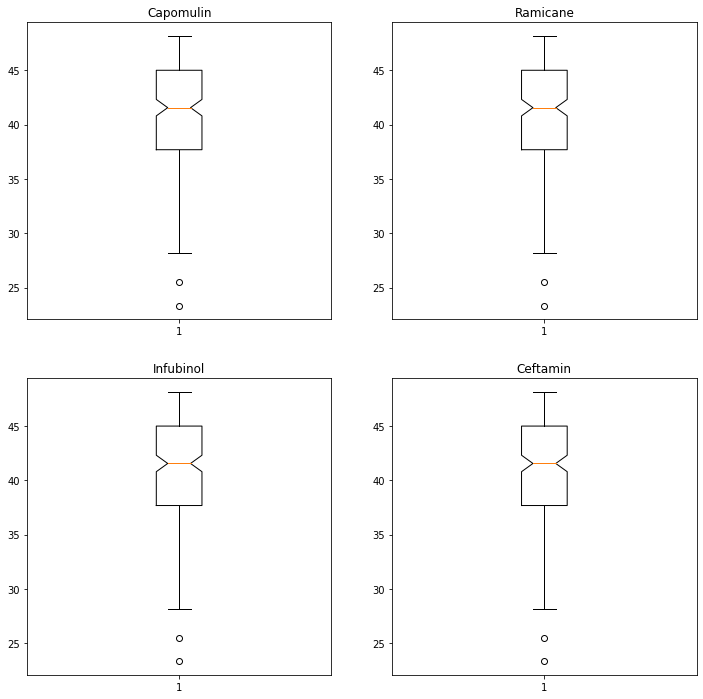

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots(2,2, figsize=(12,12))
ax[0][0].set_title('Capomulin')
ax[0][0].boxplot(capomulin['Tumor Volume (mm3)'], notch=True)
ax[0][1].set_title('Ramicane')
ax[0][1].boxplot(capomulin['Tumor Volume (mm3)'], notch=True)
ax[1][0].set_title('Infubinol')
ax[1][0].boxplot(capomulin['Tumor Volume (mm3)'], notch=True)
ax[1][1].set_title('Ceftamin')
ax[1][1].boxplot(capomulin['Tumor Volume (mm3)'], notch=True)
plt.show()

## Line and scatter plots

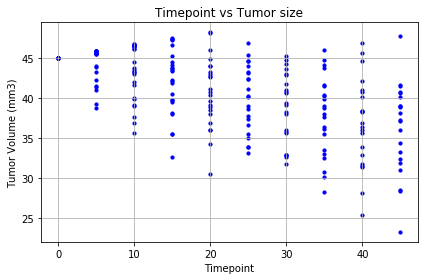

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_capomulin = combined_df.loc[combined_df['Drug Regimen']=='Capomulin']

fig, ax = plt.subplots()
ax.scatter(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'], s=10, c='blue')
ax.set_xlabel('Timepoint')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Timepoint vs Tumor size')
ax.grid(True)
fig.tight_layout()


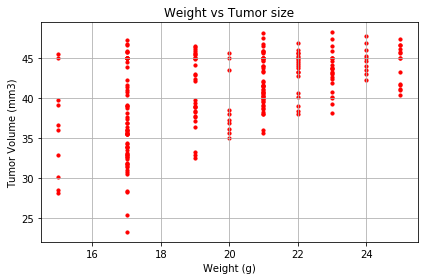

In [15]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_capomulin.head()
fig, ax = plt.subplots()
ax.scatter(mouse_capomulin['Weight (g)'], mouse_capomulin['Tumor Volume (mm3)'], s=10, c='red')
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Weight vs Tumor size')
ax.grid(True)
fig.tight_layout()

Average Tumor Volume: 40.68
Linear Regression Score : 0.2764
Linear Regression: Y = 0.96X + 21.49


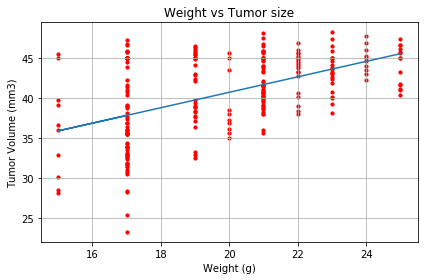

In [16]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
from sklearn.linear_model import LinearRegression
X = mouse_capomulin['Weight (g)'].values.reshape(-1,1)
y = mouse_capomulin['Tumor Volume (mm3)'].values.reshape(-1,1)
mean_tumor_volume = mouse_capomulin['Tumor Volume (mm3)'].values.mean()
print(f'Average Tumor Volume: {mean_tumor_volume:.2f}')

linear_regressor = LinearRegression()
linear_regressor.fit(X,y)

print(f'Linear Regression Score : {linear_regressor.score(X,y):.4f}')
print(f'Linear Regression: Y = {linear_regressor.coef_[0][0]:.2f}X + {linear_regressor.intercept_[0]:.2f}')

Y_pred = linear_regressor.predict(X)

fig, ax = plt.subplots()
ax.scatter(mouse_capomulin['Weight (g)'], mouse_capomulin['Tumor Volume (mm3)'], s=10, c='red')
ax.plot(X, Y_pred)
ax.set_xlabel('Weight (g)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_title('Weight vs Tumor size')
ax.grid(True)
fig.tight_layout()
